In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import Image, display
%matplotlib inline

# Load Kaggle CSV file from local dir 

In [3]:
path = "/Users/adamszabunio/DSCI6002-student/week_8/8_2_final_project"
forest = pd.read_csv(path + "/covtype.csv")

forest.shape

(581012, 55)

In [4]:
forest.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
pd.set_option("display.max_columns", forest.shape[1])
forest.columns = [col.lower() for col in forest.columns]

forest.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   horizontal_distance_to_fire_points  wilderness_area1  wilderness_area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   wilderness_area3  wilderness_area4  soil_type1  soil_type2  soil_type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   soil_type4  soil_type5  soil_type6  soil_type7  soil_type8  soil_type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   soil_type10  soil_type11  soil_type12  soil_type13  soil_type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   soil_type15  soil_type16  soil_type17  soil_type18  soil_type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   soil_type20  soil_type21  soil_type22  soil_type23  soil_type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   soil_type25  soil_type26  soil_type27  soil_type28  soil_type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [6]:
forest.describe()

elevation         aspect          slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       horizontal_distance_to_hydrology  vertical_distance_to_hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       horizontal_distance_to_roadways  hillshade_9am  hillshade_noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       hillshade_3pm  horizontal_distance_to_fire_points  wilderness_area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

       wilderness_area2  wilderness_area3  wilderness_area4     soil_type1  \
count     581012.000000     581012.000000     581012.000000  581012.000000   
mean           0.051434          0.436074          0.063627       0.005217   
std            0.220882          0.495897          0.244087       0.072039   
min            0.000000          0.000000          0.000000       0.000000   
25%            0.000000          0.000000          0.000000       0.000000   
50%            0.000000          0.000000          0.000000       0.000000   
75%            0.000000          1.000000          0.000000       0.000000   
max            1.000000          1.000000          1.000000       1.000000   

          soil_type2     soil_type3     soil_type4     soil_type5  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.012952       0.008301       0.021335       0.002749   
std         0.113066       0.090731       0.144499       0.052356   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          soil_type6     soil_type7     soil_type8     soil_type9  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.011316    

# Checking for NaN values
## Nice clean dataset with no missing values

In [7]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
elevation                             581012 non-null int64
aspect                                581012 non-null int64
slope                                 581012 non-null int64
horizontal_distance_to_hydrology      581012 non-null int64
vertical_distance_to_hydrology        581012 non-null int64
horizontal_distance_to_roadways       581012 non-null int64
hillshade_9am                         581012 non-null int64
hillshade_noon                        581012 non-null int64
hillshade_3pm                         581012 non-null int64
horizontal_distance_to_fire_points    581012 non-null int64
wilderness_area1                      581012 non-null int64
wilderness_area2                      581012 non-null int64
wilderness_area3                      581012 non-null int64
wilderness_area4                      581012 non-null int64
soil_type1                            581012 non-

# Creating subsets for selected features

In [8]:
soil = [col for col in forest.columns if "soil" in col] # 40 soil types
wilderness_types = [col for col in forest.columns if "wilderness" in col] # 40 wilderness area

continuous_features = [col for col in forest.columns if col not in soil + wilderness_types] 
continuous_features # includes the target col ("cover_type")

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'horizontal_distance_to_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hillshade_3pm',
 'horizontal_distance_to_fire_points',
 'cover_type']

In [9]:
#remove the 40 soil_type columns and 4 wilderness area columns 
forest_select_features = forest[continuous_features]
forest_select_features.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   horizontal_distance_to_fire_points  cover_type  
0                                6279           5  
1                                6225           5  
2                                6121           2  
3                                6211           2  
4                                6172           5

# Create a target column for predictions (cover types)

In [10]:
target = [continuous_features.pop()] # remove "cover_type" from the continous features 
target # change to list for list wise operations later

['cover_type']

# Heavy Class Imbalance

In [11]:
forest_select_features.cover_type.value_counts(sort=False)

1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: cover_type, dtype: int64

In [12]:
tree_dict = {1 : 'Spruce / Fir',
             2 : 'Lodgepole Pine',
             3 : 'Ponderosa Pine',
             4 : 'Cottonwood / Willow',
             5 : 'Aspen',
             6 : 'Douglas-fir',
             7 : 'Krummholz'}

tree_val = [v for v in tree_dict.values()] # Save Cover Type dictionary vlaues for better plotting

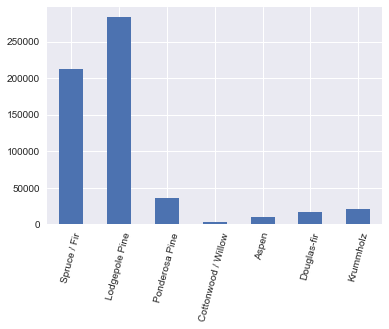

In [13]:
forest.cover_type.value_counts(sort=False).plot(kind='bar').set_xticklabels(tree_val, rotation=75);

# Load Images from local and internet (for presentation)

Spruce / Fir


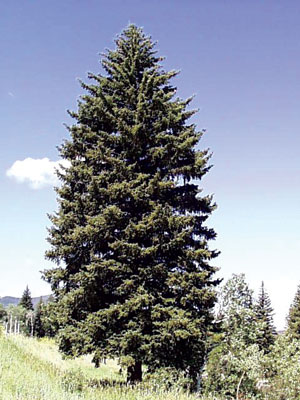

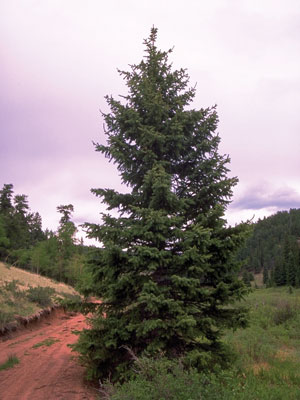

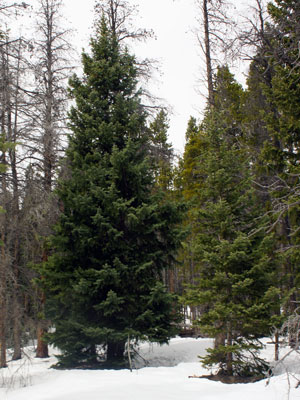

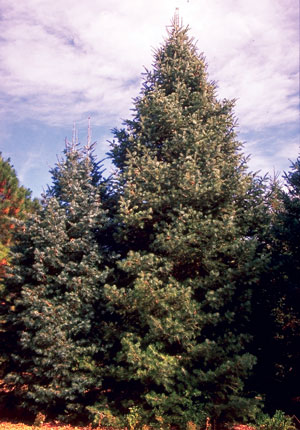

In [14]:
print(tree_dict[1])
#Blue Spruce
#Picea pungens
a = Image(filename="images/blue-spruce-tree.jpg")
#Engelmann Spruce
#Picea engelmannii
b = Image(filename="images/Eng-Spruce-tree.jpg")
#Subalpine Fir
#Abies lasiocarpa
c = Image(filename="images/Subalpine-fir-tree.jpg")
#White Fir
#Abies concolor
d = Image(filename="images/White-Fir-tree.jpg")
display(a, b, c, d)

Lodgepole Pine


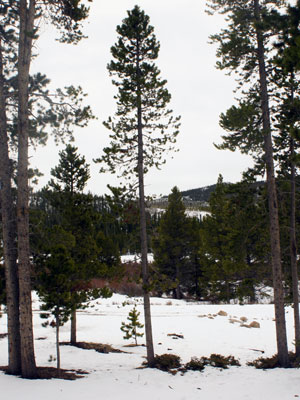

In [15]:
print(tree_dict[2])
#Pinus contorta
Image("http://csfs.colostate.edu/media/sites/22/2014/02/lodgepole-tree2.jpg")

Ponderosa Pine


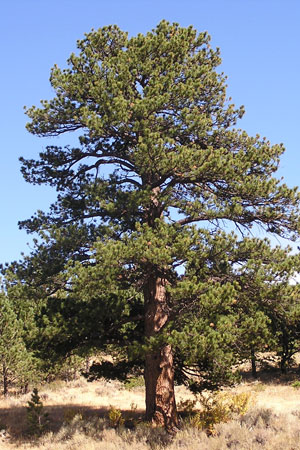

In [16]:
print(tree_dict[3])
#Pinus ponderosa
Image("http://csfs.colostate.edu/media/sites/22/2014/02/ponderosa-tree-modern.jpg")

Cottonwood / Willow


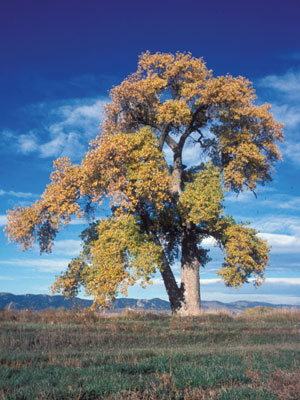

In [17]:
print(tree_dict[4])
#Plains Cottonwood
#Populus deltoides

Image("http://csfs.colostate.edu/media/sites/22/2016/04/Plains-Cotton-tree.jpg")

Aspen


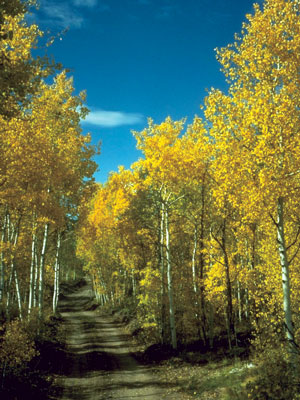

In [18]:
print(tree_dict[5])
#Quaking Aspen
#Populus tremuloides

Image("http://csfs.colostate.edu/media/sites/22/2016/04/Aspen-trees-path.jpg")

Douglas-fir


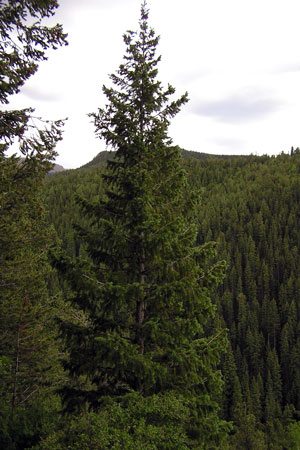

In [19]:
print(tree_dict[6])
#Pseudotsuga menziesii
Image("http://csfs.colostate.edu/media/sites/22/2014/02/Douglas-fir-treerevised.jpg")

Krummholz


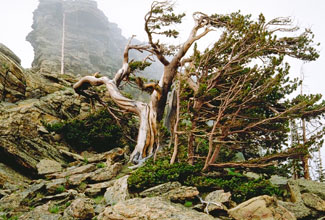

In [20]:
print(tree_dict[7])
Image('https://www.nps.gov/romo/learn/nature/images/Tree_LimberPine_325x220_2.jpg')

# Explore the wilderness areas

In [21]:
#create a dataframe with only wilderness areas and cover type
forest_wilderness = forest[wilderness_types + target]

# melt dataframe for plotting value counts 
melted_df = pd.melt(forest_wilderness, id_vars=['cover_type'],\
                    value_vars=['wilderness_area1', 'wilderness_area2','wilderness_area3', 'wilderness_area4'])

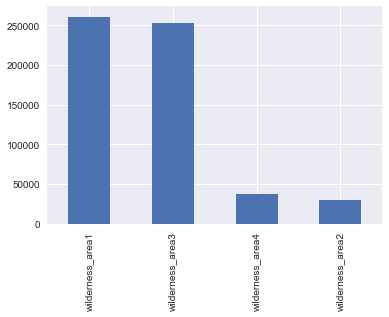

In [22]:
melted_df.variable[melted_df.value == 1].value_counts().plot(kind='bar');

# Easier way to go about making the same plot as above 
- Note the below plot is not sorted in order of higest counts

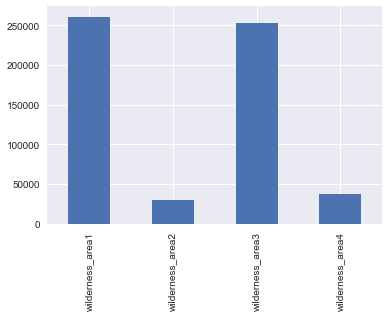

In [23]:
forest[wilderness_types].sum().plot(kind='bar');

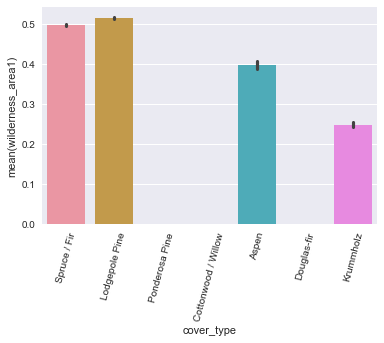

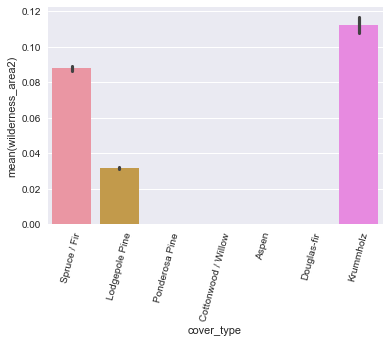

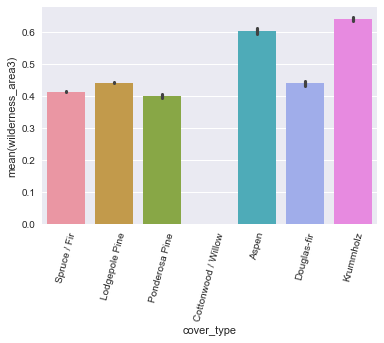

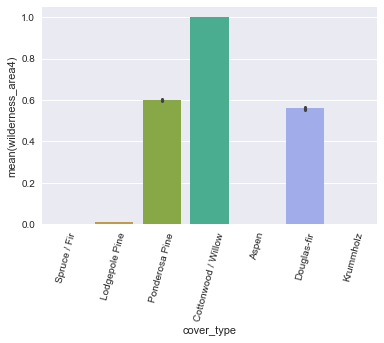

In [24]:
# plotting the percentage of tree types (y-axis) within each wilderness area 
for col in wilderness_types:
    sns.barplot(x="cover_type",y=col ,data=forest_wilderness).set_xticklabels(tree_val, rotation=75); 
    plt.show();

## From the above plots we see that the distribution of tree types within wilderness areas has high variability. 
- One tree type is exclusive to one wilderness area (Cottonwood/Willow --> wilderness area 4).
- While all others are in at least two wilderness areas. 
- Only Lodgepole Pine is found in all 4 wilderness areas. 

# From this point forward, will focus EDA (Exploratory Data Analysis) on only one tree type, Krummholz

In [25]:
#what the duece is a 'Krummholz'?
print(
'''
krumm·holz
ˈkro͝omhōlts/
noun
stunted windblown trees growing near the tree line on mountains.
'''
)


krumm·holz
ˈkro͝omhōlts/
noun
stunted windblown trees growing near the tree line on mountains.



In [26]:
Image('http://slideplayer.com/slide/3570572/12/images/12/Forest-tundra+transition:+VEGETATION.jpg')

<IPython.core.display.Image object>

Krummholz means "crooked wood". Trees at the $\textbf{upper limit}$ of their habitat range - $\textbf{11,700' (3566m)}$ are stunted and twisted due to high winds, snow, ice, short growing seasons, and $\textbf{shallow, poorly developed soils}$.

This is a transition zone between subalpine forest and alpine tundra, and an important refuge during storms for some mammals and birds who primarily live on tundra. Because bristlecone pine and limber pines grow extremely slowly, their small statures often belie true ages. Some are $\textbf{over 1000 years old}$.

https://www.nps.gov/grsa/learn/nature/naturalfeaturesandecosystems.htm

In [27]:
krummholz_select_features = forest[continuous_features + target].query("cover_type == 7")\
                                                                .rename(columns={'cover_type': 'krummholz'})
krummholz_select_features.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
1654       3273     159     12                               300   
1655       3264     137     10                               283   
1656       3256     143      7                               234   
1662       3268     176     16                               270   
1663       3268     179     15                               270   

      vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
1654                              55                             2863   
1655                              45                             2773   
1656                              37                             2713   
1662                              50                             2955   
1663                              50                             2925   

      hillshade_9am  hillshade_noon  hillshade_3pm  \
1654            233             242            138   
1655            236             236            131   
1656            231             239            140   
1662            227             247            148   
1663            225             248            151   

      horizontal_distance_to_fire_points  krummholz  
1654                                2439          7  
1655                                2529          7  
1656                                2589          7  
1662                                2347          7  
1663                                2377          7

# Comparing boxplots of continous features for all tree types

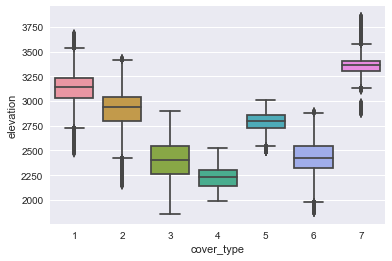

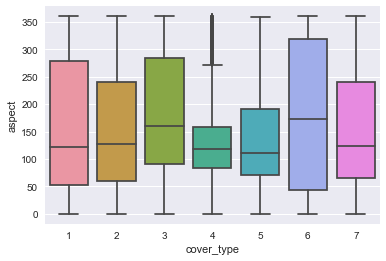

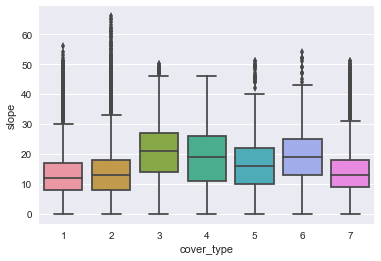

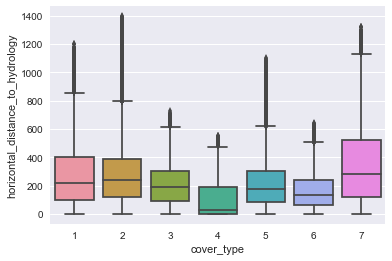

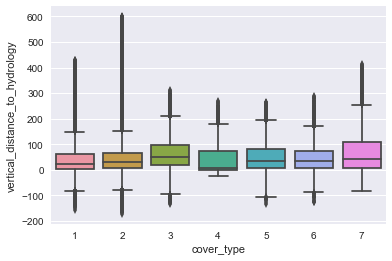

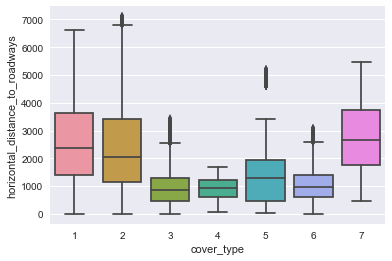

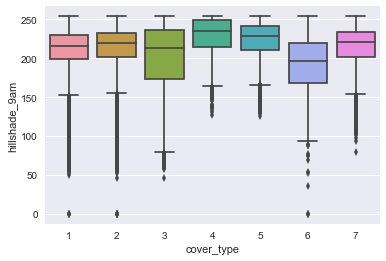

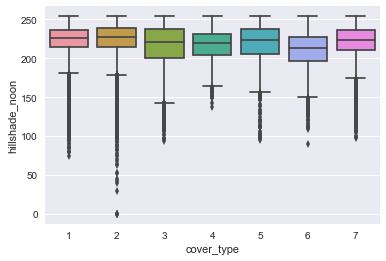

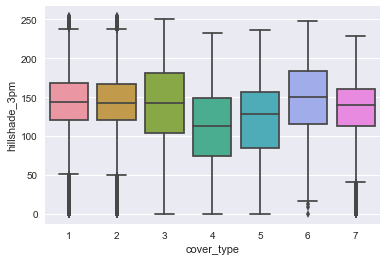

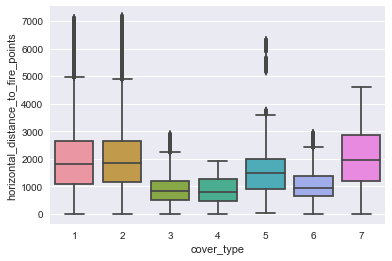

In [28]:
for col in continuous_features:
    sns.boxplot(x="cover_type",y=col ,data=forest_select_features)
    plt.show();

# Boxplots are showing quite a few "outiers" exist at the extremes. Violin plots may be better for comparison since they use KDE (Kernel Density Estimates)

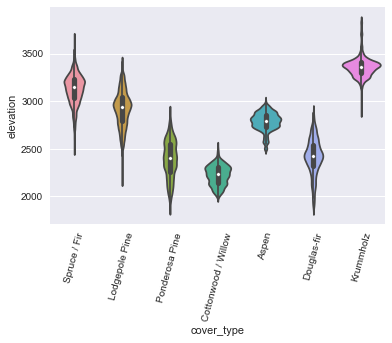

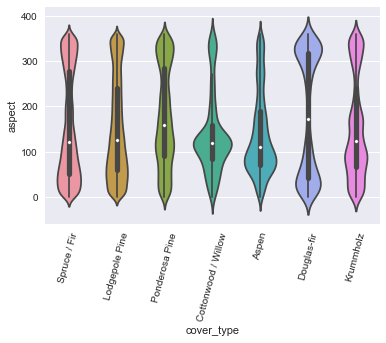

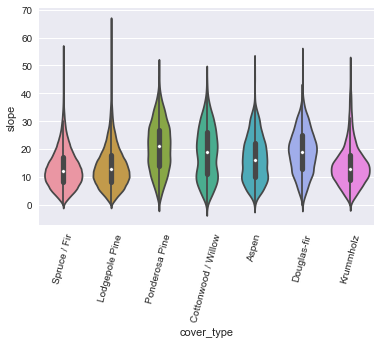

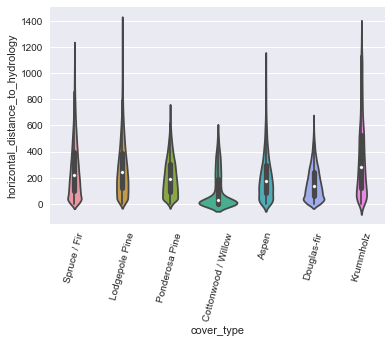

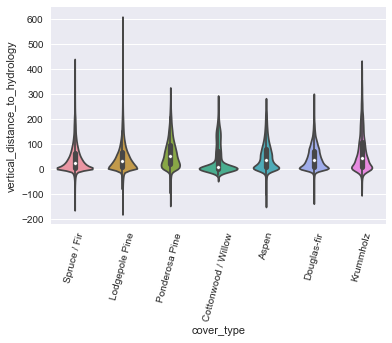

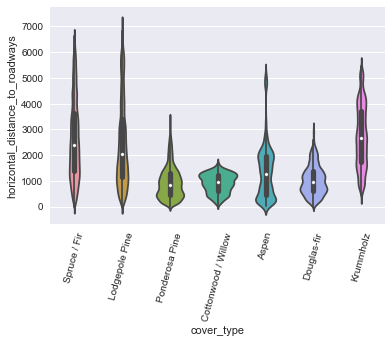

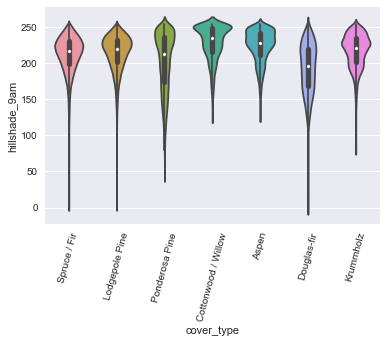

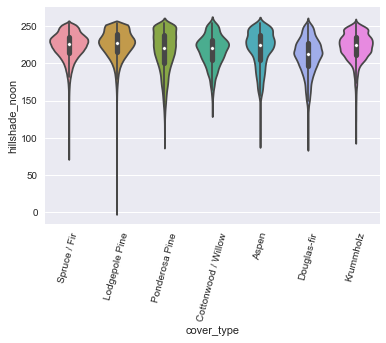

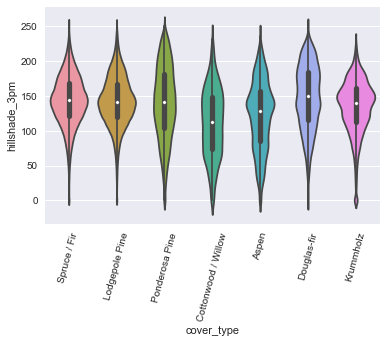

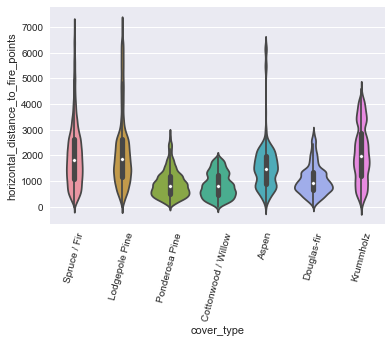

In [29]:
for col in continuous_features:
    sns.violinplot(x='cover_type', y=col, data=forest_select_features, scale='area')\
    .set_xticklabels(tree_val, rotation=75)
    plt.show();

# Comparing Distributions of all trees vs. Krummholz

/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


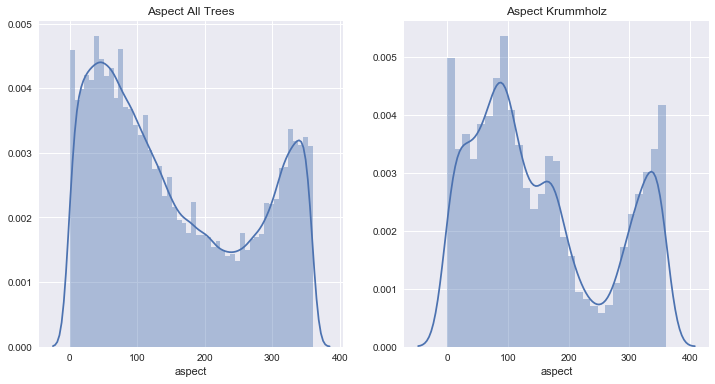

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Aspect All Trees')
ax2.set_title('Aspect Krummholz')

sns.distplot(forest_select_features['aspect'], ax=ax1);
sns.distplot(krummholz_select_features['aspect'], ax=ax2);

# Above plots show that the "continuous features" are bounded between 0 and 360 degrees. The same applies to the features: 
- [hillshade_9am, hillshade_noon, hillshade_3pm]
- slope is also bounded (0 - 90 degrees)

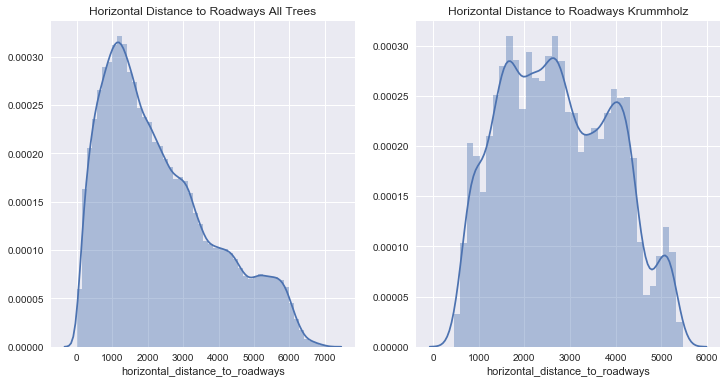

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Horizontal Distance to Roadways All Trees')
ax2.set_title('Horizontal Distance to Roadways Krummholz')

sns.distplot(forest_select_features['horizontal_distance_to_roadways'], ax=ax1);
sns.distplot(krummholz_select_features['horizontal_distance_to_roadways'], ax=ax2);

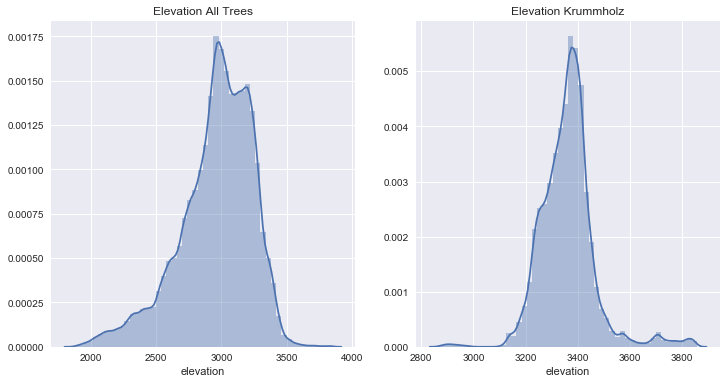

In [496]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Elevation All Trees')
ax2.set_title('Elevation Krummholz')

sns.distplot(forest_select_features['elevation'], ax=ax1);
# sns.distplot(forest_select_features['elevation'][forest_select_features.cover_type.isin(np.arange(1,7))], ax=ax1);
sns.distplot(krummholz_select_features['elevation'], ax=ax2);

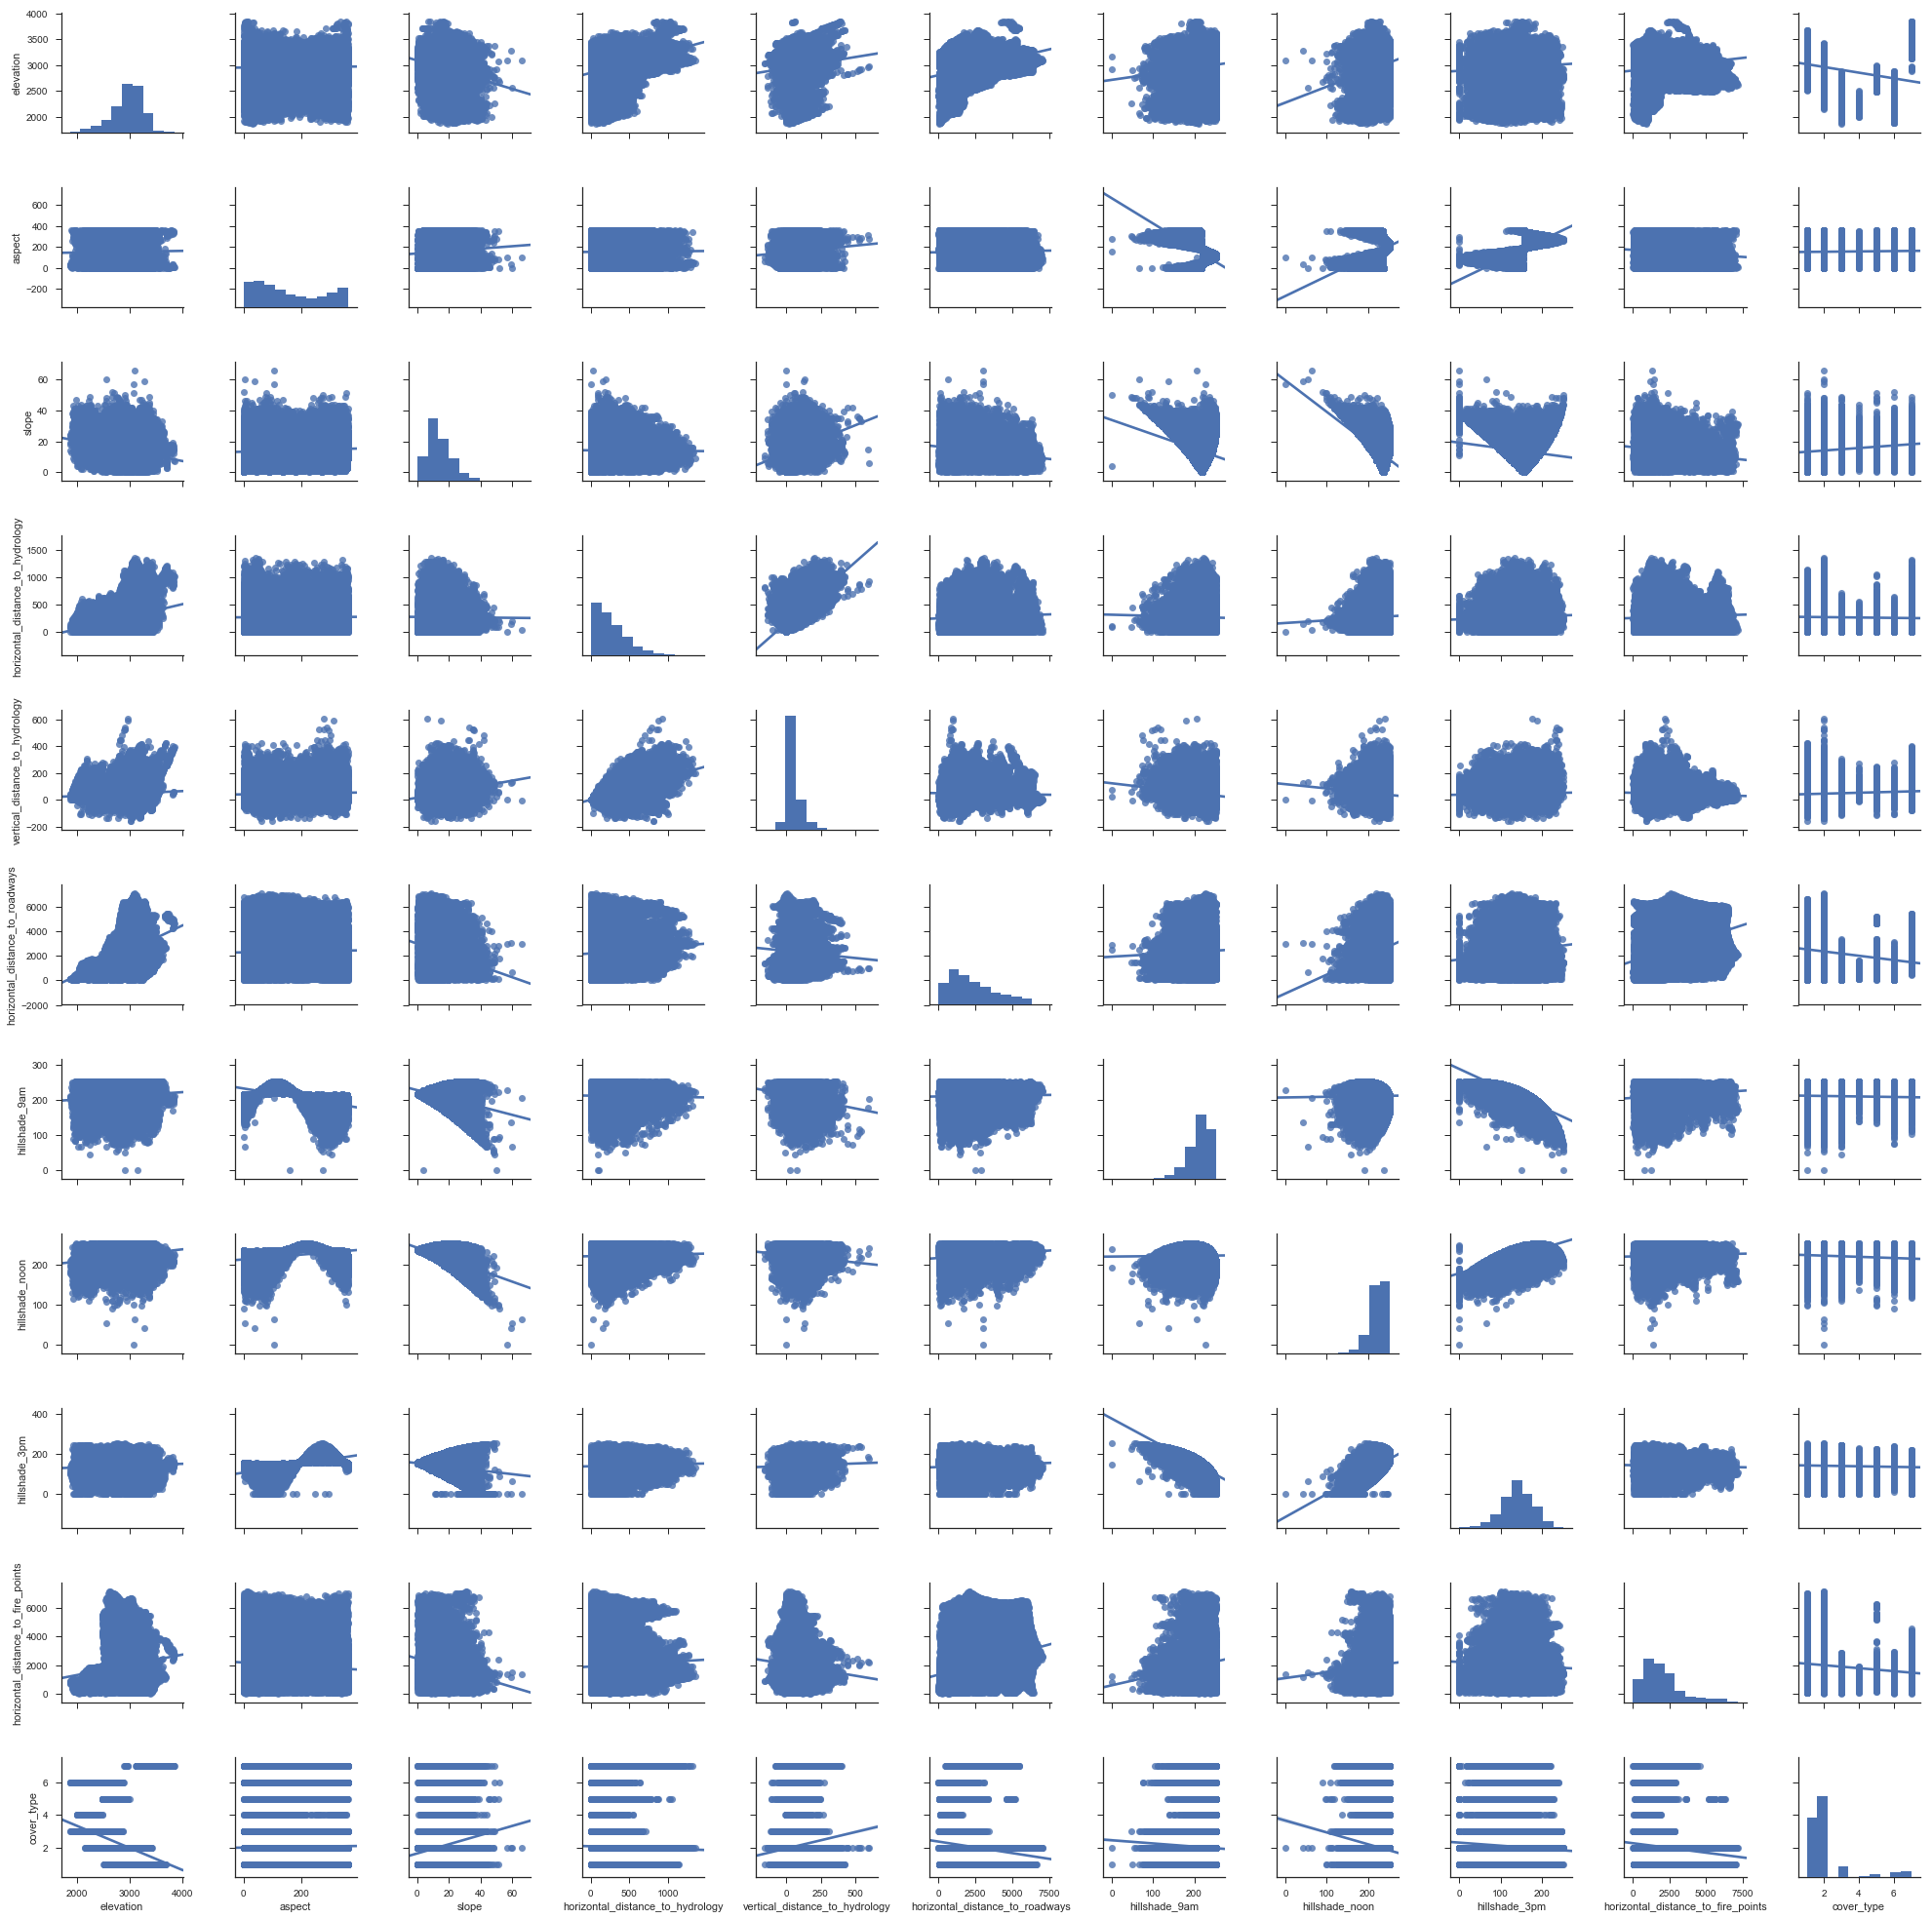

In [55]:
sns.pairplot(predict_variables, kind='reg'); # not the right idea, only leaving because it took 30 minutes to generate

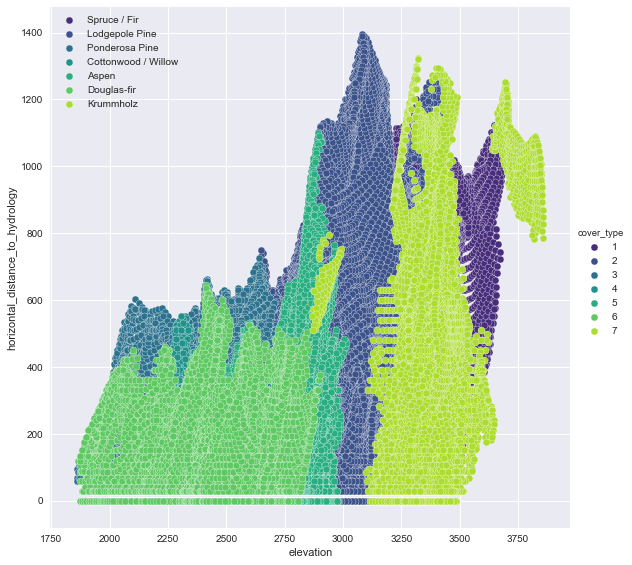

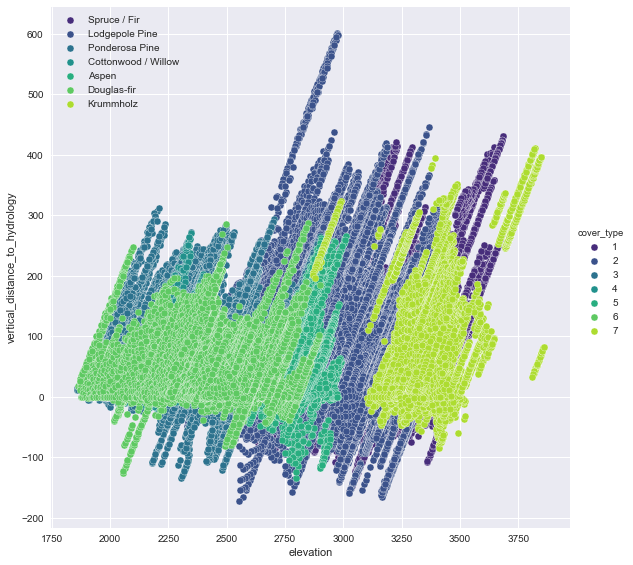

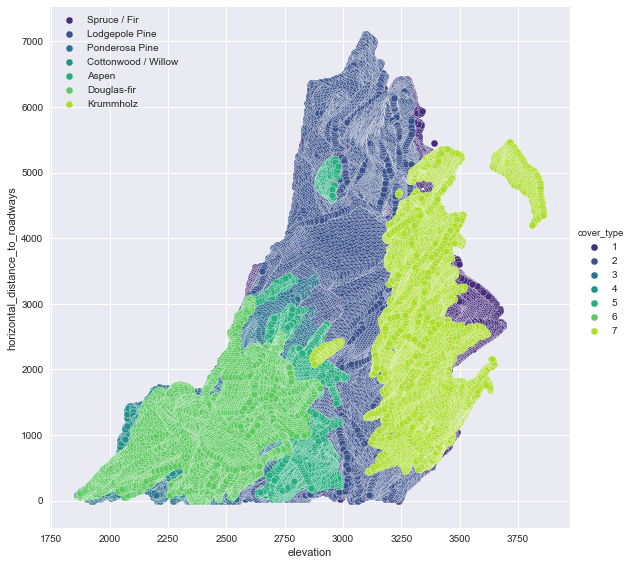

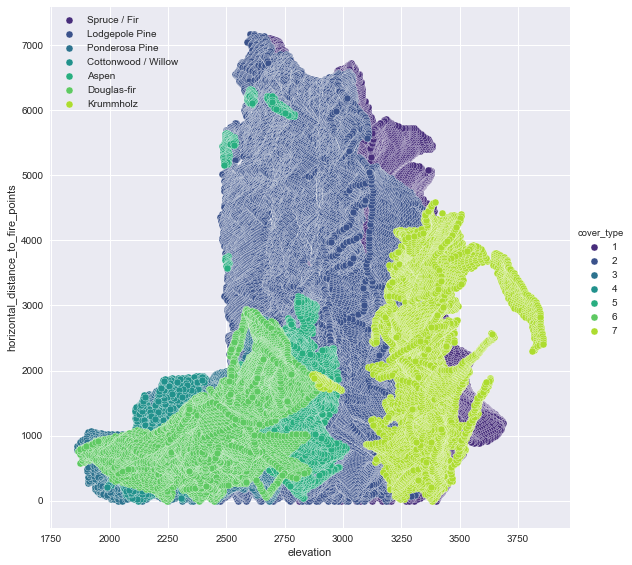

In [52]:
real_continuous_features = [col for col in continuous_features if "dist" in col]
for col in real_continuous_features:
    sns.pairplot(forest_select_features, hue="cover_type", size=8, palette="viridis",\
             x_vars="elevation", y_vars=col)
    plt.legend(tree_val, loc='upper left')
    plt.show();

# Fit a distribution to Elevation feature for Krummholz
## From previous plotting, we noticed a somewhat normal distribution with high kurtosis. 
## Lets try out a Double Laplacian distribution to see if it is a better fit

In [20]:
μ, σ = stats.norm.fit(krummholz_select_features['elevation'])
print(μ)
print(σ)

3361.92866894
106.912694129


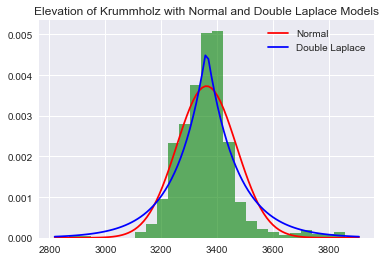

In [51]:
plt.hist(krummholz_select_features['elevation'], bins=25, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, μ, σ)
plt.plot(x, p, 'r')
p2 = stats.laplace.pdf(x, μ, σ)
plt.plot(x, p2, 'b')
plt.title("Elevation of Krummholz with Normal and Double Laplace Models")
plt.legend(['Normal', 'Double Laplace'], loc='upper right')
plt.show;

From the general description of a Krummholz tree we found that they are found at an elevation of: $\textbf{11,700' (3566m)}$

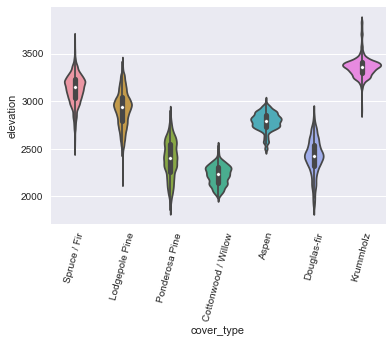

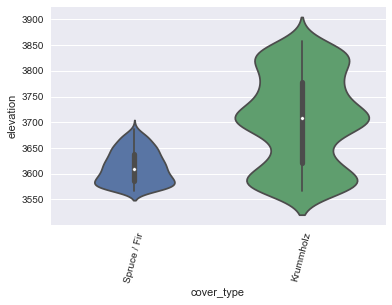

In [172]:
#show the distribution of all trees distribution based on elevation 
sns.violinplot(x='cover_type', y='elevation',\
               data=forest_select_features, scale='area').set_xticklabels(tree_val, rotation=75);
plt.show()

#all cover_types above 11,700 feet
sns.violinplot(x='cover_type', y='elevation',\
               data=forest_select_features[forest_select_features.elevation > 3566], scale='count')\
               .set_xticklabels([tree_val[0],tree_val[6]], rotation=75);

In [25]:
print("Percentage of Spruce/Fir that are above 11,700' (3566m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3566].cover_type.value_counts()[1]\
                /forest_select_features.cover_type.value_counts()[1])*100))
print("Percentage of Krummholz that are above 11,700' (3566m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3566].cover_type.value_counts()[7]\
                /forest_select_features.cover_type.value_counts()[7])*100))
print("Percentage of Spruce/Fir that are above 10,500' (3200m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3200].cover_type.value_counts()[1]\
                /forest_select_features.cover_type.value_counts()[1])*100))
print("Percentage of Krummholz that are above 10,500' (3200m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3200].cover_type.value_counts()[7]\
                /forest_select_features.cover_type.value_counts()[7])*100))

Percentage of Spruce/Fir that are above 11,700' (3566m) elevation = 0.22%
Percentage of Krummholz that are above 11,700' (3566m) elevation = 3.82%
Percentage of Spruce/Fir that are above 10,500' (3200m) elevation = 35.03%
Percentage of Krummholz that are above 10,500' (3200m) elevation = 96.57%


# Hypothesis Test

We want to test the null hypothesis ($H_0$), that the proportion of any type of tree in any soil type will be evenly distributed.  

$H_0: p(tree) = \frac{1}{40}$  $(= .025)$

against the alternative hypothesis ($H_1$), that the proportion of any type of tree in any soil type will not be evenly distributed.  

$H_1: p(tree) \neq \frac{1}{40}$  $(\neq .025)$

We set the significance level $ \alpha = 0.01$

The test method is a two-tail z-test for proportions 

To calculate this, we need to find the point estimate and standard error

Standard Error of Sample Proportion 

$SE = \sqrt{\frac{P(tree)\times(1 - P(tree))}{n}}$

In [53]:
#One of the Moran Family soil-types
soil_38_vals = [8729, 740, 0, 0, 0, 0, 6104]
       
total_counts = [forest.cover_type.value_counts()[n] for n in range(1,8)] #indexing each cover_type (1-7)

for i,j in enumerate(soil_38_vals):
    p = j
    n = total_counts[i]
    point_estimate = p/n
    SE = np.sqrt((point_estimate*(1 - point_estimate))/n)
    print(f"Point Estimate: {point_estimate:.2}")
    print(f"SE: {SE:.2}")

Point Estimate: 0.041
SE: 0.00043
Point Estimate: 0.0026
SE: 9.6e-05
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.3
SE: 0.0032


Next we find the Z-score

$Z = \frac{point_{est} - H_0}{SE}$

In [54]:
#rather than calculating the z-score by hand, we can wrap it in porportions_ztest 
for i,j in enumerate(soil_38_vals):
    p = j
    n = total_counts[i]
    tree_zscore, tree_pvalue = proportions_ztest(p, n, 0.025) #H_0 = .025
    print(f"Sample proportion: {p / n:.2}")
    print(f"z-score: {tree_zscore:.2}")
    print(f"p-value: {tree_pvalue:.2}")

Sample proportion: 0.041
z-score: 3.8e+01
p-value: 3.5e-308
Sample proportion: 0.0026
z-score: -2.3e+02
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.3
z-score: 8.5e+01
p-value: 0.0


/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:575: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


Since these p-values are very small, we reject the null hypothesis and have strong evidence in favor of the alternative hypothesis. 

The p-value in each case is $ < 0.01 = \alpha$, so we reject the null hypothesis in all cases. At the 1% level of significance, we did find sufficient evidence to conclude that the proportion of any type of tree in any soil type will be evenly distributed. 

### If a tree falls in the woods... does it tell you what soil type it prefers?

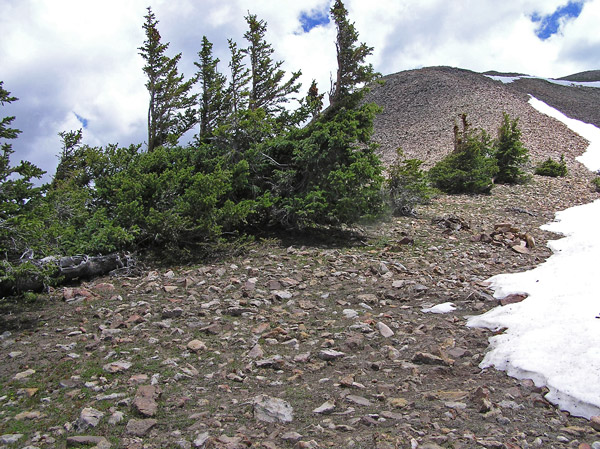

In [78]:
Image('http://www.swcoloradowildflowers.com/Tree%20Enlarged%20Photos/6pien.jpg')

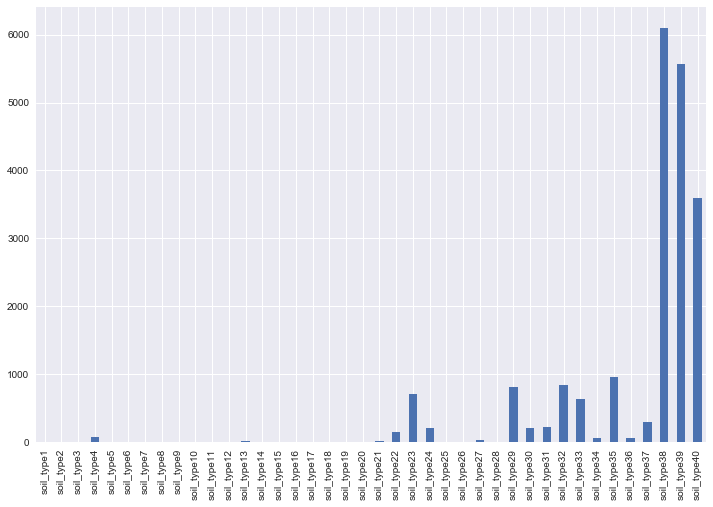

In [77]:
forest.query("cover_type == 7")[soil].sum().plot(kind="bar", figsize=(12,8));

### Clearly, Krummholz prefers soil types 38, 39 and 40. How about the other trees?

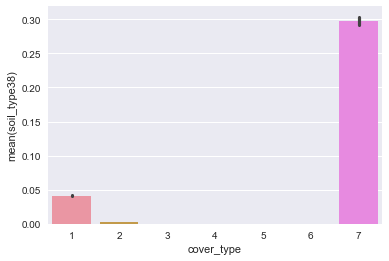

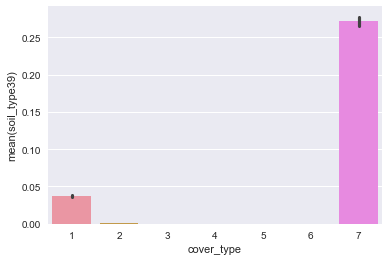

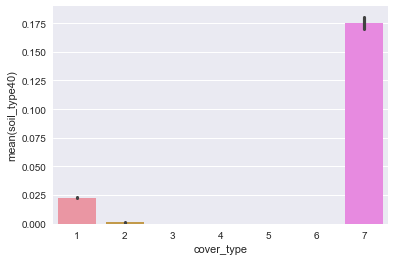

In [69]:
for col in soil[-3:]: # From above we look at just the last three soil_types
    sns.barplot(x="cover_type",y=col ,data=forest[soil+target])
    plt.show();

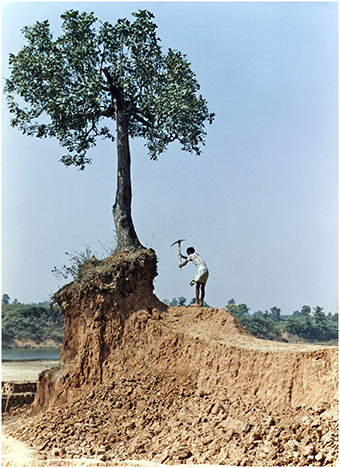

In [50]:
Image("http://www.frontiersin.org/files/Articles/180646/fenvs-04-00041-HTML/image_m/fenvs-04-00041-g005.jpg")

# Probabaility 

In [63]:
soil_type38 = forest.query("soil_type38==1")
soil_38_counts = soil_type38.cover_type.value_counts(sort=False)
prob_soil_38 = pd.DataFrame({'soil_38_counts': soil_38_counts}, index=np.arange(1,8)).replace(np.nan, 0)
prob_soil_38

soil_38_counts
1          8729.0
2           740.0
3             0.0
4             0.0
5             0.0
6             0.0
7          6104.0

In [64]:
total_counts = [forest.cover_type.value_counts()[n] for n in range(1,8)]
#append total columns 
prob_soil_38['total_counts'] = total_counts

In [65]:
#append conditional and marginal probabilities (multiplied by 100)
prob_soil_38['soil_38_cond'] = \
            prob_soil_38.soil_38_counts.values / sum(prob_soil_38.soil_38_counts.values) *100
prob_soil_38['soil_38_joint'] = \
            [(j/total_counts[i]*100) for i,j in enumerate(prob_soil_38.soil_38_counts.values)]

# Soil type 38:  Leighcan - Moran families - Cryaquolls complex, extremely stony 


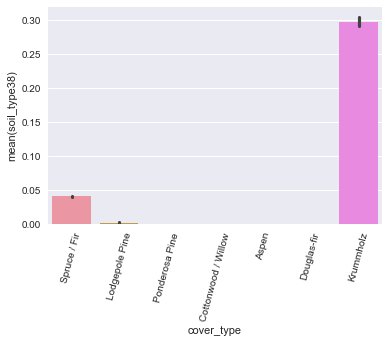

soil_38_counts  total_counts  soil_38_cond  soil_38_joint
1          8729.0        211840         56.05           4.12
2           740.0        283301          4.75           0.26
3             0.0         35754          0.00           0.00
4             0.0          2747          0.00           0.00
5             0.0          9493          0.00           0.00
6             0.0         17367          0.00           0.00
7          6104.0         20510         39.20          29.76

In [70]:
sns.barplot(x="cover_type",y="soil_type38" ,data=forest).set_xticklabels(tree_val, rotation=75)
plt.show();
prob_soil_38.round(2)

# Soil Type 39 Moran family - Cryorthents - Leighcan family complex, extremely stony

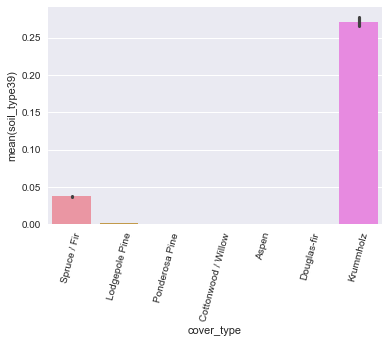

soil_39_counts  total_counts  soil_39_cond  soil_39_joint
1          7882.0        211840         57.09           3.72
2           358.0        283301          2.59           0.13
3             0.0         35754          0.00           0.00
4             0.0          2747          0.00           0.00
5             0.0          9493          0.00           0.00
6             0.0         17367          0.00           0.00
7          5566.0         20510         40.32          27.14

In [88]:
soil_39 = forest.query("soil_type39 ==1")
soil_39.cover_type.value_counts(sort=False)
soil_39_counts = soil_39.cover_type.value_counts(sort=False)
prob_soil_39 = pd.DataFrame({'soil_39_counts': soil_39_counts}, index=np.arange(1,8)).replace(np.nan, 0)

#append total columns 
prob_soil_39['total_counts'] = total_counts

#append conditional and marginal probabilities (multiplied by 100)
prob_soil_39['soil_39_cond'] = \
            prob_soil_39.soil_39_counts.values / sum(prob_soil_39.soil_39_counts.values) *100
prob_soil_39['soil_39_joint'] = \
            [(j/total_counts[i]*100) for i,j in enumerate(prob_soil_39.soil_39_counts.values)]

sns.barplot(x="cover_type",y="soil_type39" ,data=forest).set_xticklabels(tree_val, rotation=75)
plt.show();
prob_soil_39.round(2)

# Soil Type 40 Moran family - Cryorthents - Rock land complex, extremely stony

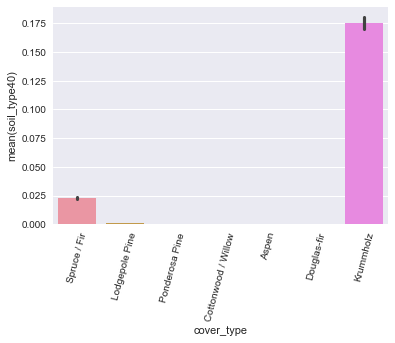

soil_40_counts  total_counts  soil_40_cond  soil_40_joint
1          4826.0        211840         55.15           2.28
2           332.0        283301          3.79           0.12
3             0.0         35754          0.00           0.00
4             0.0          2747          0.00           0.00
5             0.0          9493          0.00           0.00
6             0.0         17367          0.00           0.00
7          3592.0         20510         41.05          17.51

In [87]:
soil_40 = forest.query("soil_type40 ==1")
soil_40.cover_type.value_counts(sort=False)
soil_40_counts = soil_40.cover_type.value_counts(sort=False)
prob_soil_40 = pd.DataFrame({'soil_40_counts': soil_40_counts}, index=np.arange(1,8)).replace(np.nan, 0)

#append total columns 
prob_soil_40['total_counts'] = total_counts

#append conditional and marginal probabilities (multiplied by 100)
prob_soil_40['soil_40_cond'] = \
            prob_soil_40.soil_40_counts.values / sum(prob_soil_40.soil_40_counts.values) *100
prob_soil_40['soil_40_joint'] = \
            [(j/total_counts[i]*100) for i,j in enumerate(prob_soil_40.soil_40_counts.values)]

sns.barplot(x="cover_type",y="soil_type40" ,data=forest).set_xticklabels(tree_val, rotation=75)
plt.show();
prob_soil_40.round(2)

In [89]:
print("Precentage of all the Krummholz trees in this dataset that were found in only the Moran Family Soil Type = {:.2f}%"\
      .format(prob_soil_38.soil_38_joint[7]+prob_soil_39.soil_39_joint[7]+prob_soil_39.soil_39_joint[7]))

Precentage of all the Krummholz trees in this dataset that were found in only the Moran Family Soil Type = 84.04%


# Models
## First lets One Hot Encode the target (cover_types) column

In [31]:
forest_dummies = forest.copy()
dummy_trees = pd.get_dummies(forest_dummies['cover_type'], prefix='tree')

dummy_trees.head()

tree_1  tree_2  tree_3  tree_4  tree_5  tree_6  tree_7
0       0       0       0       0       1       0       0
1       0       0       0       0       1       0       0
2       0       1       0       0       0       0       0
3       0       1       0       0       0       0       0
4       0       0       0       0       1       0       0

In [32]:
forest_dummies = forest_dummies.join(dummy_trees["tree_7"])
forest_dummies.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   horizontal_distance_to_fire_points  wilderness_area1  wilderness_area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   wilderness_area3  wilderness_area4  soil_type1  soil_type2  soil_type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   soil_type4  soil_type5  soil_type6  soil_type7  soil_type8  soil_type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   soil_type10  soil_type11  soil_type12  soil_type13   ...    soil_type16  \
0            0            0            0            0   ...              0   
1            0            0            0            0   ...              0   
2            0            0            1            0   ...              0   
3            0            0            0            0   ...              0   
4            0            0            0            0   ...              0   

   soil_type17  soil_type18  soil_type19  soil_type20  soil_type21  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   soil_type22  soil_type23  soil_type24  soil_type25  soil_type26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   soil_type27  soil_type28  soil_type29  soil_type30  soil_type31  \
0            0            0            1            0            0   
1            0            0            1    

In [33]:
def model(n):
    model = 'tree_' + str(n) + ' ~ ' 
    for col in continuous_features:
        if col == "horizontal_distance_to_fire_points":
            model = model + str(col)
        else:
            model = model + str(col) + " + "
    return model 

print(model(7))

tree_7 ~ elevation + aspect + slope + horizontal_distance_to_hydrology + vertical_distance_to_hydrology + horizontal_distance_to_roadways + hillshade_9am + hillshade_noon + hillshade_3pm + horizontal_distance_to_fire_points


In [34]:
logit_continuous = smf.logit(formula=model(7), data=forest_dummies).fit()
logit_continuous.summary()

Optimization terminated successfully.
         Current function value: 0.079204
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   581001
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Dec 2017   Pseudo R-squ.:                  0.4813
Time:                        21:39:16   Log-Likelihood:                -46018.
converged:                       True   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                            -57.1024      0.516   -110.758      0.000       -58.113   -56.092
elevation                              0.0179      0.000    172.320      0.000         0.018     0.018
aspect                                 0.0014      0.000     12.685      0.000         0.001     0.002
slope                                 -0.0232      0.002     -9.618      0.000        -0.028    -0.018
horizontal_distance_to_hydrology      -0.0014   5.19e-05    -26.830      0.000        -0.001    -0.001
vertical_distance_to_hydrology        -0.0037      0.000    -18.657      0.000        -0.004    -0.003
horizontal_distance_to_roadways     5.257e-05   6.38e-06      8.239      0.000      4.01e-05  6.51e-05
hillshade_9am                         -0.0072      0.002     -3.166      0.002        -0.012    -0.003
hillshade_noon                         0.0027      0.002      1.424      0.154        -0.001     0.006
hillshade_3pm                         -0.0176      0.002     -9.639      0.000        -0.021    -0.014
horizontal_distance_to_fire_points  7.089e-05   8.18e-06      8.668      0.000      5.49e-05  8.69e-05
======================================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
logit_continuous.fittedvalues.describe()

count    581012.000000
mean         -7.914147
std           4.983270
min         -27.558570
25%         -10.524122
50%          -7.238001
75%          -4.275264
max           7.749565
dtype: float64

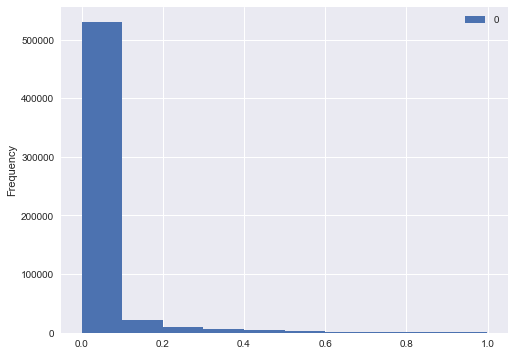

In [36]:
probabilities = pd.DataFrame(logit_continuous.predict())
probabilities.plot(kind="hist", figsize=(8,6));

In [37]:
probabilities["preds"] = probabilities[0].apply(lambda x: 0 if x < 0.5 else 1)
probabilities.head()

0  preds
0  7.835916e-07      0
1  7.537594e-07      0
2  3.306129e-05      0
3  2.042493e-05      0
4  8.747840e-07      0

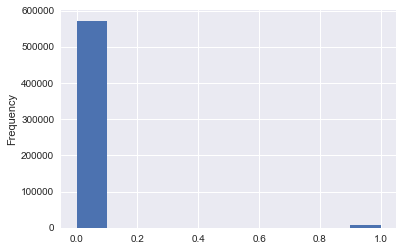

In [39]:
probabilities["preds"].plot(kind="hist");

In [40]:
logit_continuous.pred_table()

array([[ 556900.,    3602.],
       [  15061.,    5449.]])

In [41]:
select_formula = 'tree_7 ~ C(soil_type38) + C(soil_type39) + C(soil_type40) + C(wilderness_area3)'
logit_select = smf.logit(formula=select_formula, data=forest_dummies).fit()
logit_select.summary()

Optimization terminated successfully.
         Current function value: 0.088524
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   581007
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Dec 2017   Pseudo R-squ.:                  0.4203
Time:                        21:40:07   Log-Likelihood:                -51433.
converged:                       True   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -5.6034      0.020   -274.307      0.000        -5.643    -5.563
soil_type38          4.5136      0.023    192.984      0.000         4.468     4.559
soil_type39          4.4656      0.024    187.223      0.000         4.419     4.512
soil_type40          4.8141      0.029    167.817      0.000         4.758     4.870
wilderness_area3     1.5633      0.019     82.010      0.000         1.526     1.601
====================================================================================
"""

In [42]:
logit_select.pred_table()

array([[ 555939.,    4563.],
       [  10654.,    9856.]])

In [45]:
three_soil_wilderness3 = "+ C(soil_type38) + C(soil_type39) + C(soil_type40) + C(wilderness_area3)"
model_with_categorical = model(7)+ three_soil_wilderness3
logit_with_categorical = smf.logit(formula=model_with_categorical, data=forest_dummies).fit()

logit_with_categorical.summary()

Optimization terminated successfully.
         Current function value: 0.063219
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   580997
Method:                           MLE   Df Model:                           14
Date:                Sun, 03 Dec 2017   Pseudo R-squ.:                  0.5860
Time:                        21:47:47   Log-Likelihood:                -36731.
converged:                       True   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                            -49.9245      0.553    -90.220      0.000       -51.009   -48.840
C(soil_type38)[T.1]                    2.2599      0.028     79.780      0.000         2.204     2.315
C(soil_type39)[T.1]                    2.5428      0.029     86.296      0.000         2.485     2.601
C(soil_type40)[T.1]                    1.4438      0.040     35.763      0.000         1.365     1.523
C(wilderness_area3)[T.1]               2.0861      0.024     88.591      0.000         2.040     2.132
elevation                              0.0150      0.000    121.354      0.000         0.015     0.015
aspect                                 0.0003      0.000      2.591      0.010      7.97e-05     0.001
slope                                 -0.0374      0.003    -14.225      0.000        -0.043    -0.032
horizontal_distance_to_hydrology      -0.0020   5.86e-05    -34.479      0.000        -0.002    -0.002
vertical_distance_to_hydrology        -0.0019      0.000     -8.536      0.000        -0.002    -0.001
horizontal_distance_to_roadways    -4.201e-05   8.38e-06     -5.015      0.000     -5.84e-05 -2.56e-05
hillshade_9am                         -0.0078      0.002     -3.454      0.001        -0.012    -0.003
hillshade_noon                         0.0059      0.002      3.084      0.002         0.002     0.010
hillshade_3pm                         -0.0190      0.002    -10.567      0.000        -0.023    -0.016
horizontal_distance_to_fire_points     0.0003   9.76e-06     32.492      0.000         0.000     0.000
======================================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
logit_with_categorical.pred_table()

array([[ 556679.,    3823.],
       [   9982.,   10528.]])

### Pseudo R-Squared for all three models 

In [49]:
logit_continuous.prsquared, logit_select.prsquared, logit_with_categorical.prsquared

(0.48134278439730105, 0.42031441745550679, 0.58601559043417395)

In [86]:
'''
Borrowed from: https://github.com/statsmodels/statsmodels/issues/1577, 
Modified from: 
tp, fp, fn, tn = map(float, pred_table.flatten())
To: 
tn, fn, fp, tp = map(float, pred_table.flatten())
'''
def precision(pred_table):
    """
    Precision given pred_table. Binary classification only. Assumes group 0 # Stats_models default (opposite day)
    is the True.

    Analagous to (absence of) Type I errors. Probability that a randomly
    selected document is classified correctly. I.e., no false negatives.
    """
    tn, fn, fp, tp = map(float, pred_table.flatten())
    return tp / (tp + fp)


def recall(pred_table):
    """
    Precision given pred_table. Binary classification only. Assumes group 0 # Same problem as above
    is the True.

    Analagous to (absence of) Type II errors. Out of all the ones that are
    true, how many did you predict as true. I.e., no false positives.
    """
    tn, fn, fp, tp = map(float, pred_table.flatten())
    try:
        return tp / (tp + fn)
    except ZeroDivisionError:
        return np.nan


def accuracy(pred_table):
    """
    Precision given pred_table. Binary classification only. Assumes group 0 # Look above
    is the True.
    """
    tn, fn, fp, tp = map(float, pred_table.flatten())
    return (tp + tn) / (tp + tn + fp + fn)


def fscore_measure(pred_table, b=1):
    """
    For b, 1 = equal importance. 2 = recall is twice important. .5 recall is
    half as important, etc.
    """
    r = recall(pred_table)
    p = precision(pred_table)
    try:
        return (1 + b**2) * r*p/(b**2 * p + r)
    except ZeroDivisionError:
        return np.nan

In [96]:
confusion_matricies = {"Continuous Features": logit_continuous.pred_table(), 
                       "Select Categorical Features": logit_select.pred_table(), 
                       "Continuous and Select Categorical Features": logit_with_categorical.pred_table()}

for k, v in confusion_matricies.items():
    heading = k +" Logistic Regression:"
    print(heading)
    print("-"*len(heading))
    print("Precision: {:.4f}\n".format(precision(v)))
    print("Recall: {:.4f}\n".format(recall(v)))
    print("Accuracy: {:.4f}\n".format(accuracy(v)))
    print("F1 score: {:.4f}".format(fscore_measure(v)))
    print("-"*len(heading) +"\n")

Continuous Features Logistic Regression:
----------------------------------------
Precision: 0.2657

Recall: 0.6020

Accuracy: 0.9679

F1 score: 0.3687
----------------------------------------

Select Categorical Features Logistic Regression:
------------------------------------------------
Precision: 0.4805

Recall: 0.6835

Accuracy: 0.9738

F1 score: 0.5643
------------------------------------------------

Continuous and Select Categorical Features Logistic Regression:
---------------------------------------------------------------
Precision: 0.5133

Recall: 0.7336

Accuracy: 0.9762

F1 score: 0.6040
---------------------------------------------------------------



### Interpretations of Results above:
- All models have very high accuracy, however this is a terrible measure as the accuracy is highly skewed by the massive class imbalances
- Model with only continuous features has the lowest precision. Much lower than 4 categorical features (albeit these were handpicked after extensive EDA)
- Not surprisingly the model with a combination of categorical and continuous features outpreforms the individual models. 
### Need to standarize Features!
- Below, when we try and fit the model with all features, we run into errors (even if the faetures are regularized) 

### NOTE: statsmodel assumes "0" to be true and "1" to be False

In [79]:
test = forest_dummies.copy()
test.tree_7 = test.tree_7.apply(lambda x: 1 if x == 0 else 0)

logit_test = smf.logit(formula=model(7), data=test).fit()
logit_test.summary()

Optimization terminated successfully.
         Current function value: 0.079204
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   581001
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Dec 2017   Pseudo R-squ.:                  0.4813
Time:                        10:13:34   Log-Likelihood:                -46018.
converged:                       True   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                             57.1024      0.516    110.758      0.000        56.092    58.113
elevation                             -0.0179      0.000   -172.320      0.000        -0.018    -0.018
aspect                                -0.0014      0.000    -12.685      0.000        -0.002    -0.001
slope                                  0.0232      0.002      9.618      0.000         0.018     0.028
horizontal_distance_to_hydrology       0.0014   5.19e-05     26.830      0.000         0.001     0.001
vertical_distance_to_hydrology         0.0037      0.000     18.657      0.000         0.003     0.004
horizontal_distance_to_roadways    -5.257e-05   6.38e-06     -8.239      0.000     -6.51e-05 -4.01e-05
hillshade_9am                          0.0072      0.002      3.166      0.002         0.003     0.012
hillshade_noon                        -0.0027      0.002     -1.424      0.154        -0.006     0.001
hillshade_3pm                          0.0176      0.002      9.639      0.000         0.014     0.021
horizontal_distance_to_fire_points -7.089e-05   8.18e-06     -8.668      0.000     -8.69e-05 -5.49e-05
======================================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Results are exactly the same as when "1" is true and "0" is False. Only the interpretation of the confusion matrix needs to be modified

In [80]:
logit_test.pred_table() # with the assumption of the confusion matrix is in the "typical" form: tp and tn along the diagonals

array([[   5449.,   15061.],
       [   3602.,  556900.]])

### Lets try and fit the entire model (all features) 

In [50]:
def categorize(var):
    return "C(" + var + ")"

all_feats = continuous_features + [categorize(f) for f in wilderness_types] + [categorize(f) for f in soil]

In [52]:
def full_model(n):
    model = 'tree_' + str(n) + ' ~ ' 
    for col in all_feats:
        if col == "C(soil_type40)":
            model = model + str(col)
        else:
            model = model + str(col) + " + "
    return model 
full_model(7)

'tree_7 ~ elevation + aspect + slope + horizontal_distance_to_hydrology + vertical_distance_to_hydrology + horizontal_distance_to_roadways + hillshade_9am + hillshade_noon + hillshade_3pm + horizontal_distance_to_fire_points + C(wilderness_area1) + C(wilderness_area2) + C(wilderness_area3) + C(wilderness_area4) + C(soil_type1) + C(soil_type2) + C(soil_type3) + C(soil_type4) + C(soil_type5) + C(soil_type6) + C(soil_type7) + C(soil_type8) + C(soil_type9) + C(soil_type10) + C(soil_type11) + C(soil_type12) + C(soil_type13) + C(soil_type14) + C(soil_type15) + C(soil_type16) + C(soil_type17) + C(soil_type18) + C(soil_type19) + C(soil_type20) + C(soil_type21) + C(soil_type22) + C(soil_type23) + C(soil_type24) + C(soil_type25) + C(soil_type26) + C(soil_type27) + C(soil_type28) + C(soil_type29) + C(soil_type30) + C(soil_type31) + C(soil_type32) + C(soil_type33) + C(soil_type34) + C(soil_type35) + C(soil_type36) + C(soil_type37) + C(soil_type38) + C(soil_type39) + C(soil_type40)'

In [63]:
full_logit = smf.logit(formula=full_model(7), data=forest_dummies).fit(maxiter=100)
full_logit.summary()

         Current function value: 0.057636
         Iterations: 100


/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/base/model.py:971: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   580959
Method:                           MLE   Df Model:                           52
Date:                Sun, 03 Dec 2017   Pseudo R-squ.:                  0.6226
Time:                        23:01:42   Log-Likelihood:                -33487.
converged:                      False   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                            -41.9959   3.02e+05     -0.000      1.000     -5.91e+05  5.91e+05
C(wilderness_area1)[T.1]             -28.8093        nan        nan        nan           nan       nan
C(wilderness_area2)[T.1]             -28.6965        nan        nan        nan           nan       nan
C(wilderness_area3)[T.1]             -25.9676        nan        nan        nan           nan       nan
C(wilderness_area4)[T.1]             -38.4613        nan        nan        nan           nan       nan
C(soil_type1)[T.1]                    -2.1209   1.53e+09  -1.39e-09      1.000        -3e+09     3e+09
C(soil_type2)[T.1]                    -4.8582   5.97e+05  -8.14e-06      1.000     -1.17e+06  1.17e+06
C(soil_type3)[T.1]                    -7.7603   8.26e+06   -9.4e-07      1.000     -1.62e+07  1.62e+07
C(soil_type4)[T.1]                    24.6602        nan        nan        nan           nan       nan
C(soil_type5)[T.1]                   -14.6953   7.75e+11   -1.9e-11      1.000     -1.52e+12  1.52e+12
C(soil_type6)[T.1]                    -1.1557   2.64e+08  -4.38e-09      1.000     -5.17e+08  5.17e+08
C(soil_type7)[T.1]                   -27.4827   1.71e+11  -1.61e-10      1.000     -3.35e+11  3.35e+11
C(soil_type8)[T.1]                    -5.1859   1.73e+06  -2.99e-06      1.000      -3.4e+06   3.4e+06
C(soil_type9)[T.1]                    -1.1314   1.63e+06  -6.94e-07      1.000      -3.2e+06   3.2e+06
C(soil_type10)[T.1]                   -9.4965   2.01e+06  -4.73e-06      1.000     -3.94e+06  3.94e+06
C(soil_type11)[T.1]                  -22.6376   1.26e+09  -1.79e-08      1.000     -2.48e+09  2.48e+09
C(soil_type12)[T.1]                  -19.1050    1.9e+08  -1.01e-07      1.000     -3.72e+08  3.72e+08
C(soil_type13)[T.1]                   17.2343        nan        nan        nan           nan       nan
C(soil_type14)[T.1]                   -3.2044   1.15e+07  -2.78e-07      1.000     -2.26e+07  2.26e+07
C(soil_type15)[T.1]                  -20.4300   3.24e+15   -6.3e-15      1.000     -6.35e+15  6.35e+15
C(soil_type16)[T.1]                  -18.7462   1.88e+08  -9.96e-08      1.000     -3.69e+08  3.69e+08
C(soil_type17)[T.1]                   -7.1851   8.05e+05  -8.93e-06      1.000     -1.58e+06  1.58e+06
C(soil_type18)[T.1]                  -19.6365   7.02e+08   -2.8e-08      1.000     -1.38e+09  1.38e+09
C(soil_type19)[T.1]                   18.3627        nan        nan        nan           nan       nan
C(soil_type20)[T.1]                 -265.6563   3.47e+61  -7.65e-60      1.000     -6.81e+61  6.81e+61
C(soil_type21)[T.1]                   18.4955        nan        nan        nan           nan       nan
C(soil_type22)[T.1]                   18.4918        nan        nan        nan           nan       nan
C(soil_type23)[T.1]                   19.3825        nan        nan        nan           nan       nan
C(soil_type24)[T.1]                   19.0851   

### Not even regularization (L1) helps. Features need to be scaled appropriately. OR we can choose a model that can handle a mix of features. Time to move on.

In [64]:
full_logit = smf.logit(formula=full_model(7), data=forest_dummies).fit_regularized()
full_logit.summary()

/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1213: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1263: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0576449593321
            Iterations: 346
            Function evaluations: 376
            Gradient evaluations: 346


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 tree_7   No. Observations:               581012
Model:                          Logit   Df Residuals:                   580957
Method:                           MLE   Df Model:                           54
Date:                Sun, 03 Dec 2017   Pseudo R-squ.:                  0.6225
Time:                        23:04:59   Log-Likelihood:                -33492.
converged:                       True   LL-Null:                       -88726.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                            -37.6646   3.15e+05     -0.000      1.000     -6.17e+05  6.17e+05
C(wilderness_area1)[T.1]             -10.9409   4.32e+05  -2.54e-05      1.000     -8.46e+05  8.46e+05
C(wilderness_area2)[T.1]             -10.8312   4.32e+05  -2.51e-05      1.000     -8.47e+05  8.47e+05
C(wilderness_area3)[T.1]              -8.0973   4.32e+05  -1.88e-05      1.000     -8.46e+05  8.46e+05
C(wilderness_area4)[T.1]              -7.7173   4.33e+05  -1.78e-05      1.000     -8.48e+05  8.48e+05
C(soil_type1)[T.1]                    -1.0187   4.57e+05  -2.23e-06      1.000     -8.96e+05  8.96e+05
C(soil_type2)[T.1]                    -1.2839   4.57e+05  -2.81e-06      1.000     -8.96e+05  8.96e+05
C(soil_type3)[T.1]                    -0.2031   4.57e+05  -4.44e-07      1.000     -8.96e+05  8.96e+05
C(soil_type4)[T.1]                     2.3125   4.57e+05   5.06e-06      1.000     -8.96e+05  8.96e+05
C(soil_type5)[T.1]                    -0.1088   4.57e+05  -2.38e-07      1.000     -8.96e+05  8.96e+05
C(soil_type6)[T.1]                     0.1989   4.57e+05   4.35e-07      1.000     -8.96e+05  8.96e+05
C(soil_type7)[T.1]                    -0.1545   4.57e+05  -3.38e-07      1.000     -8.96e+05  8.96e+05
C(soil_type8)[T.1]                    -0.3288   4.57e+05  -7.19e-07      1.000     -8.96e+05  8.96e+05
C(soil_type9)[T.1]                    -0.0177   4.57e+05  -3.88e-08      1.000     -8.96e+05  8.96e+05
C(soil_type10)[T.1]                   -4.6398   4.57e+05  -1.01e-05      1.000     -8.96e+05  8.96e+05
C(soil_type11)[T.1]                   -3.3935   4.57e+05  -7.42e-06      1.000     -8.96e+05  8.96e+05
C(soil_type12)[T.1]                   -5.5620   4.57e+05  -1.22e-05      1.000     -8.96e+05  8.96e+05
C(soil_type13)[T.1]                   -5.2833   4.57e+05  -1.16e-05      1.000     -8.96e+05  8.96e+05
C(soil_type14)[T.1]                   -0.0174   4.57e+05  -3.81e-08      1.000     -8.96e+05  8.96e+05
C(soil_type15)[T.1]                -3.825e-05   4.57e+05  -8.36e-11      1.000     -8.96e+05  8.96e+05
C(soil_type16)[T.1]                   -3.4752   4.57e+05   -7.6e-06      1.000     -8.96e+05  8.96e+05
C(soil_type17)[T.1]                   -3.1400   4.57e+05  -6.87e-06      1.000     -8.96e+05  8.96e+05
C(soil_type18)[T.1]                   -1.9523   4.57e+05  -4.27e-06      1.000     -8.96e+05  8.96e+05
C(soil_type19)[T.1]                   -3.4210   4.57e+05  -7.48e-06      1.000     -8.96e+05  8.96e+05
C(soil_type20)[T.1]                   -7.9222   4.57e+05  -1.73e-05      1.000     -8.96e+05  8.96e+05
C(soil_type21)[T.1]                   -3.8791   4.57e+05  -8.48e-06      1.000     -8.96e+05  8.96e+05
C(soil_type22)[T.1]                   -3.8597   4.57e+05  -8.44e-06      1.000     -8.96e+05  8.96e+05
C(soil_type23)[T.1]                   -2.9651   4.57e+05  -6.48e-06      1.000     -8.96e+05  8.96e+05
C(soil_type24)[T.1]                   -3.2618   

____